In [2]:
import pandas as pd 
df = pd.read_excel("../../武汉打车.xlsx", engine = "openpyxl")
df.head()

,mapbegin,mapbeginlon,mapbeginlat,mapbeginlon.1,mapbeginlat.1,mapend,mapendlon,mapendlat,mapendlon.1,mapendlat.1,打车次数
0,民族大道光谷广场-公交站路东,114.386925,30.500459,114.398925,30.504459,光谷|曙光星城B区,114.391000,30.482508,114.403000,30.486508,174
1,民族大道光谷广场-公交站路东,114.386925,30.500459,114.398925,30.504459,光谷天地,114.397825,30.473273,114.409825,30.477273,158
2,民族大道光谷广场-公交站路东,114.386925,30.500459,114.398925,30.504459,光谷|丽顿酒店,114.410591,30.497201,114.422591,30.501201,145
3,纸坊|金逸影城(九全嘉国际广场店),114.317790,30.354540,114.329790,30.358540,纸坊|江夏体育馆,114.303393,30.349184,114.315393,30.353184,142
4,纸坊|美味传奇农家菜馆,114.306421,30.348027,114.318421,30.352027,江夏区第一人民医院,114.308387,30.367964,114.320387,30.371964,140


In [7]:
import numpy as np
mapbeginlon = np.expand_dims(np.array(df.mapbeginlon.unique()), axis = 1)
mapbeginlat = np.expand_dims(np.array(df.mapbeginlat.unique()), axis = 1)
places = df.mapbegin.unique()
x = np.concatenate((mapbeginlon, mapbeginlat), axis = -1)
y = np.zeros(x.shape[0])

(381, 2)


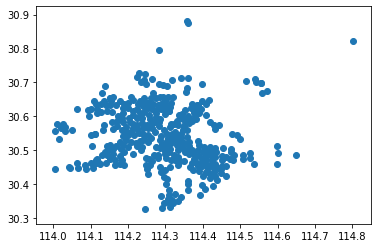

In [6]:
import matplotlib.pyplot as plt 

plt.scatter(x[:, 0], x[:, 1])
plt.show()

#### K-means
steps:

* determine the value of K
* choose K cluster centers randomly
* each data point is assigned to its closest centroid
* use the mean of each cluster to update the each centroid 
* repeat until no more new assignment
* return the K centroid

In [47]:
import random

def distance(x1, x2):
    return (x1[0] - x2[0]) ** 2 + (x1[1] - x2[1]) ** 2

def K_means(X, K, y):
    centroids = np.zeros((K, 2))
    for i in range(K):
       centroids[i] = (np.array([random.uniform(114.0, 114.8), random.uniform(30.3, 30.9)]))
    iteration = 0
    new_centroids = centroids
    while np.sum((new_centroids - centroids) * (new_centroids - centroids)) < 1e-3 and iteration < 20:
        centroids = new_centroids
        for i in range(X.shape[0]):
            distances = [distance(X[i], centroids[j]) for j in range(centroids.shape[0])]
            y[i] = distances.index(min(distances))
        iteration += 1
        for i in range(K):
            new_centroids[i] = (np.sum(X[:, 0] * (y == i)) / np.sum(y == i), np.sum(X[:, 1] * (y == i)) / np.sum(y == i) )
    return y, new_centroids
        
y, centroids = K_means(x, 5, y)
print(y, centroids)

[2. 1. 1. 2. 0. 2. 4. 1. 1. 0. 2. 0. 4. 1. 2. 2. 1. 4. 2. 4. 4. 4. 0. 0.
 0. 4. 1. 0. 0. 2. 2. 1. 2. 2. 1. 0. 4. 4. 4. 2. 2. 1. 0. 0. 3. 4. 4. 2.
 4. 0. 2. 4. 2. 2. 0. 4. 1. 2. 4. 4. 4. 1. 1. 0. 0. 4. 2. 4. 0. 4. 4. 1.
 1. 2. 4. 4. 2. 0. 0. 4. 0. 0. 4. 1. 2. 4. 0. 1. 3. 4. 0. 4. 0. 4. 1. 4.
 0. 1. 1. 2. 1. 2. 0. 1. 4. 0. 4. 4. 4. 4. 4. 1. 0. 0. 0. 1. 0. 2. 4. 0.
 0. 4. 4. 4. 4. 4. 4. 2. 0. 4. 4. 2. 0. 2. 1. 3. 4. 0. 4. 2. 0. 4. 1. 2.
 1. 1. 1. 3. 0. 4. 0. 0. 2. 4. 0. 0. 2. 4. 4. 0. 4. 0. 4. 1. 2. 1. 0. 2.
 1. 1. 1. 4. 0. 4. 2. 0. 4. 4. 4. 0. 4. 1. 4. 0. 4. 4. 0. 0. 4. 1. 0. 0.
 1. 4. 1. 4. 0. 4. 4. 1. 4. 4. 1. 0. 1. 1. 4. 1. 4. 4. 0. 0. 4. 0. 1. 1.
 1. 0. 4. 1. 4. 0. 1. 1. 4. 4. 2. 4. 0. 1. 0. 2. 4. 1. 4. 0. 2. 2. 1. 0.
 0. 2. 0. 0. 2. 0. 4. 1. 0. 0. 0. 0. 0. 1. 0. 4. 1. 4. 4. 1. 0. 2. 3. 0.
 0. 0. 1. 4. 4. 2. 4. 0. 0. 0. 2. 3. 2. 2. 0. 0. 3. 0. 4. 2. 0. 4. 1. 4.
 4. 1. 4. 3. 0. 2. 0. 1. 4. 1. 0. 0. 0. 0. 1. 2. 2. 4. 1. 2. 2. 4. 2. 1.
 1. 0. 4. 1. 1. 0. 1. 3. 4. 0. 2. 0. 2. 2. 0. 4. 0.

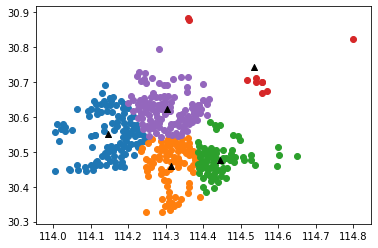

In [48]:
for i in range(5):
    plt.scatter(x[y == i][:, 0], x[y == i][:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], color = "black", marker = "^")
plt.show()

#### Silhouette
A method of interpretation and validation of clustering of data.

$$
s(i) = \frac{b(i) - a(i)}{\max \{b(i), a(i)\}}
$$

* a(i): average dissimilarty of i with all other points in the same cluster
* b(i): the lowest average dissimilarty of i to other cluster

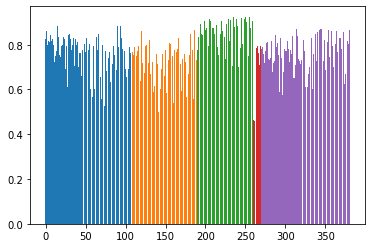

In [63]:
def silhouette(i, X, y):
    point = X[i]
    label = y[i]
    intra_distances = [distance(point, intra_point) for intra_point in X[y == label]]
    inter_distances = [distance(point, inter_point) for inter_point in X[y != label]]
    a = sum(intra_distances) / (len(intra_distances) - 1)
    b = sum(inter_distances) / len(inter_distances)
    return (b - a) / max(a, b)

K = 5
silhouettes = []
len_of_each_cluster = []
clusters = []
for i in range(x.shape[0]):
    silhouettes.append(silhouette(i, x, y))
for label in range(K):
    clusters.append(x[y == label])
    len_of_each_cluster.append(x[y == label].shape[0])
for i, cluster in enumerate(clusters):
    plt.bar(np.array(list(range(len(cluster)))) + sum(len_of_each_cluster[0:i]), np.array(silhouettes)[y == i])
    plt.show()

#### DBSCAN
The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.

Key parameters:

* eps: The distance that specifies the neighborhoods.
* minPts: Minimum number of data points to define a cluster.

Concepts:

* core point: at least minPts number of points in its surrounding area
* border point: reachable from a core point and less than minPts in surrounding area
* outlier: not core point and not reachable from core point

Steps:
* minPts and eps are determined
* A starting point is selected at random at it's neighborhood area is determined using radius eps. If there are at least minPts number of points in the neighborhood, the point is marked as core point and a cluster formation starts. If not, the point is marked as noise. Once a cluster formation starts (let's say cluster A), all the points within the neighborhood of initial point become a part of cluster A. If these new points are also core points, the points that are in the neighborhood of them are also added to cluster A.
* Next step is to randomly choose another point among the points that have not been visited in the previous steps. Then same procedure applies.
* This process is finished when all points are visited.

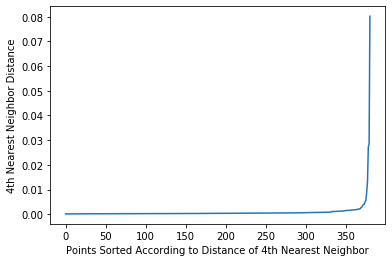

In [88]:
def k_distance(x, k):
    distances = []
    for i in range(x.shape[0]):
        i_distances = [distance(x[i], x[j]) for j in range(x.shape[0])]
        distances.append(sorted(i_distances)[k])
    return distances

k = 4
distances = k_distance(x, 4)

plt.plot(sorted(distances))
plt.xlabel("Points Sorted According to Distance of " + str(k) + "th Nearest Neighbor")
plt.ylabel(str(k) + "th Nearest Neighbor Distance")
plt.show()

##### Determine minPts and eps
* Idea is that for points in a cluster, their kth nearest neighbors are at roughly the same distance.

* Noise points have the kth nearest neighbor at farther distance 

* minPts: if k > 4 has no significant difference, but more computation, thus set k = 4.

In [112]:
def dbscan(x, minPts, eps):
    labels = (np.ones(x.shape[0]) * (-1)).astype(np.int64)
    label = 0
    while -1 in labels:
        start_position = random.sample(list(np.where(labels == -1)[0]), 1)
        for i in range(x.shape[0]):
            i_distances = [distance(x[i], x[j]) for j in range(x.shape[0])]
            k_distance = sorted(i_distances)[minPts]
            if k_distance > eps:
                labels[i] = -2
            else:
                labels[i] = label
                for j in range(x.shape[0]):
                    if i_distances[j] <= eps:
                        labels[j] = label
        label += 1
    return labels
        
labels = dbscan(x, 4, 0.002)
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -2  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -2  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -2  0  0  0  0 -2  0  0  0  0

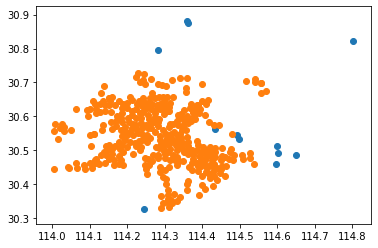

In [116]:
plt.scatter(x[labels == -2][:, 0], x[labels == -2][:, 1])
plt.scatter(x[labels == 0][:, 0], x[labels == 0][:, 1])
plt.show()